__- In this assignment, you are going to use your model to predict survival of the Titanic disaster. For this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.__

__- Download Titanic data from Kaggle. The data in the train.csv file meets your need.__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


__- Split your data into training and test sets.__

In [4]:
titanic['is_male'] = pd.get_dummies(titanic['Sex'] , drop_first = True)

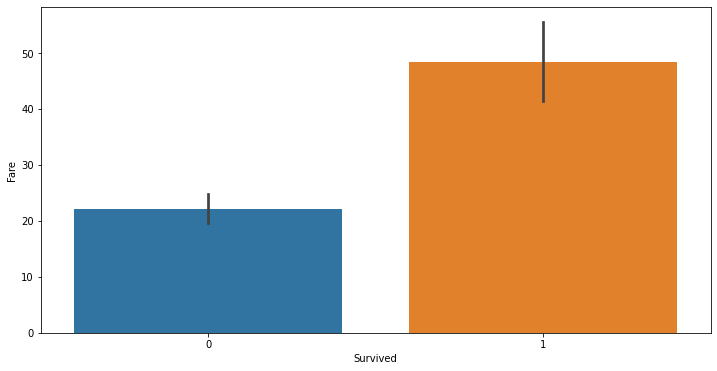

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(titanic['Survived'] , titanic['Fare'])
plt.show()

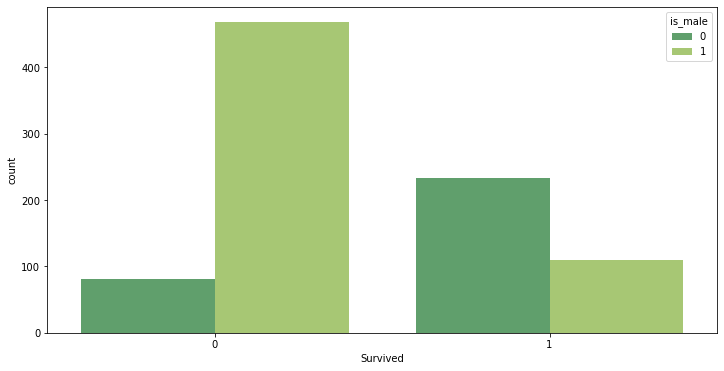

In [6]:
plt.figure(figsize=(12,6))
sns.countplot( x = 'Survived' , hue = 'is_male' , data = titanic , palette = 'summer')
plt.show()

In [7]:
titanic[['is_male' , 'Age' , 'Fare']].isnull().sum()

is_male      0
Age        177
Fare         0
dtype: int64

In [8]:
titanic.drop(titanic[titanic['Age'].isnull()].index , axis=0 , inplace = True)

In [9]:
X = titanic[['is_male' , 'Age' , 'Fare']]
Y = titanic['Survived']

In [10]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 456)

__- Predict the survival based on the test data you split by creating your model.__

In [11]:
lr = LogisticRegression()
lr.fit(X_train , Y_train)
print("train accuracy : {}".format(lr.score(X_train , Y_train)))
print("test accuracy  : {}".format(lr.score(X_test , Y_test)))

train accuracy : 0.7758318739054291
test accuracy  : 0.7902097902097902


In [12]:
lr.predict(X_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

__- Is your model's performance satisfactory? Explain.__

In [13]:
Y_train.value_counts()

0    343
1    228
Name: Survived, dtype: int64

.score() fonksiyonu ile accuracy değerlerine baktığımızda elimizde iyi bir model var diyebiliriz.

__- Try to improve your model's performance by adding or subtracting some variables.__

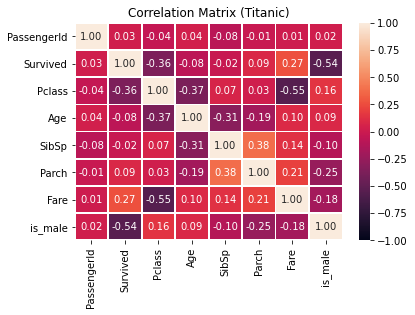

In [14]:
corr = titanic.corr()
plt.figure()
sns.heatmap(corr , annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.8, vmin=-1, vmax=1)
plt.title("Correlation Matrix (Titanic)")
plt.show()

In [15]:
X = titanic[['is_male' , 'Age' ,  'Fare' , 'Pclass']]
Y = titanic['Survived']
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 456)
lr = LogisticRegression()
lr.fit(X_train , Y_train)
print("train accuracy : {}".format(lr.score(X_train , Y_train)))
print("test accuracy  : {}".format(lr.score(X_test , Y_test)))

train accuracy : 0.7968476357267951
test accuracy  : 0.7762237762237763


In [16]:
c_values = [10 ** i for i in range(-5,5)]
accuracy_values = pd.DataFrame(columns=['c_value' , 'train_accuracy' , 'test_accuracy'])

for c in c_values:
        lr = LogisticRegression(C = c , penalty ='l2' , multi_class = 'multinomial' , solver = 'lbfgs' , random_state = 456)
        lr.fit(X_train , Y_train)
        accuracy_values = accuracy_values.append({'c_value' : c ,
                                                  'train_accuracy' : lr.score(X_train , Y_train) , 
                                                  'test_accuracy' : lr.score(X_test , Y_test)} , ignore_index = True)

In [17]:
accuracy_values

,c_value,train_accuracy,test_accuracy
0,0.00001,0.658494,0.629371
1,0.00010,0.665499,0.629371
2,0.00100,0.677758,0.643357
3,0.01000,0.765324,0.755245
4,0.10000,0.800350,0.790210
5,1.00000,0.793345,0.776224
6,10.00000,0.795096,0.769231
7,100.00000,0.795096,0.769231
8,1000.00000,0.795096,0.769231
9,10000.00000,0.795096,0.769231


En iyi accuracy değerini c = 0.1 değerinde verdi. 

__- Explore the advantages and disadvantages of Logistic Regression and discuss with your mentor.__

Lojistik regresyon analizi, bağımlı ve bağımsız değişken arasındaki ilişkinin doğrusal olmasını gerektirmez. Lojistik
regresyon, doğrusal olmayan ilişkiyi koruyarak, ilişkinin formunu doğrusal hale getiren logaritmik dönüştürmeler yapar. Lojistik regresyon bağımlı değişkene ilişkin verilerin dağılımının bir ya da daha fazla bağımsız değişkenle doğrusal olmayan ilişki gösterdiğinin bilinmesi ya da beklenilmesi durumunda özellikle yararlıdır.